In [264]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [265]:
def remove_fullstop(text):
    try:
        text = ''.join(ch for ch in text if ch not in '.')
    except:
        pass
    return text

In [266]:
original = pd.read_csv('/content/assignment_test.csv', na_values='?', sep=' *, *')
original.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
original.drop(['Income_knn', 'Income_lr', 'Income_dt', 'Income_rf'], axis = 1, inplace = True)
test = original.copy()

df = pd.read_csv('/content/assignment_train.csv', na_values='?', sep=' *, *')
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

df.Income = df.Income.apply(remove_fullstop)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [267]:
df.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [268]:
df['Income'].value_counts()

<=50K    31588
>50K      9928
Name: Income, dtype: int64

In [269]:
def change(text):
    if(text == '>50K'):
        return 0
    if(text == '<=50K'):
        return 1
df['Income'] = df['Income'].apply(change)

In [270]:
df['Income'].value_counts()

1    31588
0     9928
Name: Income, dtype: int64

In [271]:
df.isin([np.nan]).sum(axis=0)

id                   0
age                  0
workclass         2404
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2413
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     725
Income               0
dtype: int64

In [272]:
df['workclass'].value_counts()

Private             28819
Self-emp-not-inc     3269
Local-gov            2651
State-gov            1672
Self-emp-inc         1457
Federal-gov          1220
Without-pay            15
Never-worked            9
Name: workclass, dtype: int64

In [273]:
df['occupation'].value_counts()

Prof-specialty       5268
Craft-repair         5170
Exec-managerial      5142
Adm-clerical         4762
Sales                4705
Other-service        4171
Machine-op-inspct    2581
Transport-moving     2016
Handlers-cleaners    1759
Farming-fishing      1252
Tech-support         1221
Protective-serv       849
Priv-house-serv       194
Armed-Forces           13
Name: occupation, dtype: int64

In [274]:
df['native-country'].value_counts()

United-States                 37255
Mexico                          799
Philippines                     249
Germany                         165
Canada                          162
Puerto-Rico                     153
El-Salvador                     134
India                           127
Cuba                            117
England                         116
China                           107
South                            98
Jamaica                          91
Italy                            89
Dominican-Republic               85
Japan                            82
Guatemala                        76
Poland                           74
Vietnam                          74
Columbia                         69
Haiti                            62
Taiwan                           59
Portugal                         58
Iran                             50
Nicaragua                        43
Greece                           42
Ecuador                          40
Peru                        

In [275]:
df.isin([np.nan]).sum(axis=0)

id                   0
age                  0
workclass         2404
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2413
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     725
Income               0
dtype: int64

In [276]:
df['workclass'].fillna('Private', inplace = True)
df['occupation'].fillna('Prof-specialty', inplace = True)
df['native-country'].fillna('United-States', inplace = True)

test['workclass'].fillna('Private', inplace = True)
test['occupation'].fillna('Prof-specialty', inplace = True)
test['native-country'].fillna('United-States', inplace = True)

In [277]:
df.isin([np.nan]).sum(axis=0)

id                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41516 entries, 0 to 41515
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              41516 non-null  int64 
 1   age             41516 non-null  int64 
 2   workclass       41516 non-null  object
 3   fnlwgt          41516 non-null  int64 
 4   education       41516 non-null  object
 5   education-num   41516 non-null  int64 
 6   marital-status  41516 non-null  object
 7   occupation      41516 non-null  object
 8   relationship    41516 non-null  object
 9   race            41516 non-null  object
 10  sex             41516 non-null  object
 11  capital-gain    41516 non-null  int64 
 12  capital-loss    41516 non-null  int64 
 13  hours-per-week  41516 non-null  int64 
 14  native-country  41516 non-null  object
 15  Income          41516 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 5.1+ MB


In [279]:
df['marital-status'].value_counts()

Married-civ-spouse       19039
Never-married            13736
Divorced                  5613
Separated                 1291
Widowed                   1279
Married-spouse-absent      527
Married-AF-spouse           31
Name: marital-status, dtype: int64

In [280]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']
df['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital-status'].value_counts()

Married          19597
Never-married    13736
Separated         6904
Widowed           1279
Name: marital-status, dtype: int64

In [281]:
test['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
test['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

In [282]:
df['workclass'].value_counts()

Private             31223
Self-emp-not-inc     3269
Local-gov            2651
State-gov            1672
Self-emp-inc         1457
Federal-gov          1220
Without-pay            15
Never-worked            9
Name: workclass, dtype: int64

In [283]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)
df['workclass'].value_counts()

Private           31223
Govt_employees     5543
Self_employed      4726
Without-pay          15
Never-worked          9
Name: workclass, dtype: int64

In [284]:
test['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
test['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

In [286]:
#df = df.apply(LabelEncoder().fit_transform)
df['workclass']= LabelEncoder().fit_transform(df['workclass'])
df['education']= LabelEncoder().fit_transform(df['education'])
df['marital-status']= LabelEncoder().fit_transform(df['marital-status'])
df['occupation']= LabelEncoder().fit_transform(df['occupation'])
df['relationship']= LabelEncoder().fit_transform(df['relationship'])
df['race']= LabelEncoder().fit_transform(df['race'])
df['sex']= LabelEncoder().fit_transform(df['sex'])
df['native-country']= LabelEncoder().fit_transform(df['native-country'])

test['workclass']= LabelEncoder().fit_transform(test['workclass'])
test['education']= LabelEncoder().fit_transform(test['education'])
test['marital-status']= LabelEncoder().fit_transform(test['marital-status'])
test['occupation']= LabelEncoder().fit_transform(test['occupation'])
test['relationship']= LabelEncoder().fit_transform(test['relationship'])
test['race']= LabelEncoder().fit_transform(test['race'])
test['sex']= LabelEncoder().fit_transform(test['sex'])
test['native-country']= LabelEncoder().fit_transform(test['native-country'])

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41516 entries, 0 to 41515
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              41516 non-null  int64
 1   age             41516 non-null  int64
 2   workclass       41516 non-null  int64
 3   fnlwgt          41516 non-null  int64
 4   education       41516 non-null  int64
 5   education-num   41516 non-null  int64
 6   marital-status  41516 non-null  int64
 7   occupation      41516 non-null  int64
 8   relationship    41516 non-null  int64
 9   race            41516 non-null  int64
 10  sex             41516 non-null  int64
 11  capital-gain    41516 non-null  int64
 12  capital-loss    41516 non-null  int64
 13  hours-per-week  41516 non-null  int64
 14  native-country  41516 non-null  int64
 15  Income          41516 non-null  int64
dtypes: int64(16)
memory usage: 5.1 MB


In [289]:
df.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,26468,48,2,123075,8,11,0,12,0,4,1,0,0,40,38,0
1,47137,35,2,184685,15,10,1,0,2,2,0,0,0,40,38,1
2,21282,65,2,105252,11,9,0,12,0,4,1,0,0,40,38,0
3,46100,45,2,175990,11,9,2,3,4,4,0,0,0,38,38,1
4,15420,57,3,106103,15,10,0,12,0,4,1,0,0,60,38,0


In [290]:
df.tail()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
41511,20904,20,2,194630,11,9,0,0,0,4,1,3781,0,50,38,1
41512,14661,47,0,36169,12,14,0,9,0,4,1,0,0,60,38,0
41513,28471,28,3,191129,11,9,1,3,1,4,1,0,0,65,38,0
41514,9373,40,2,224799,9,13,0,9,0,4,1,0,0,45,38,1
41515,45800,55,2,173422,15,10,0,6,0,4,1,0,0,40,38,1


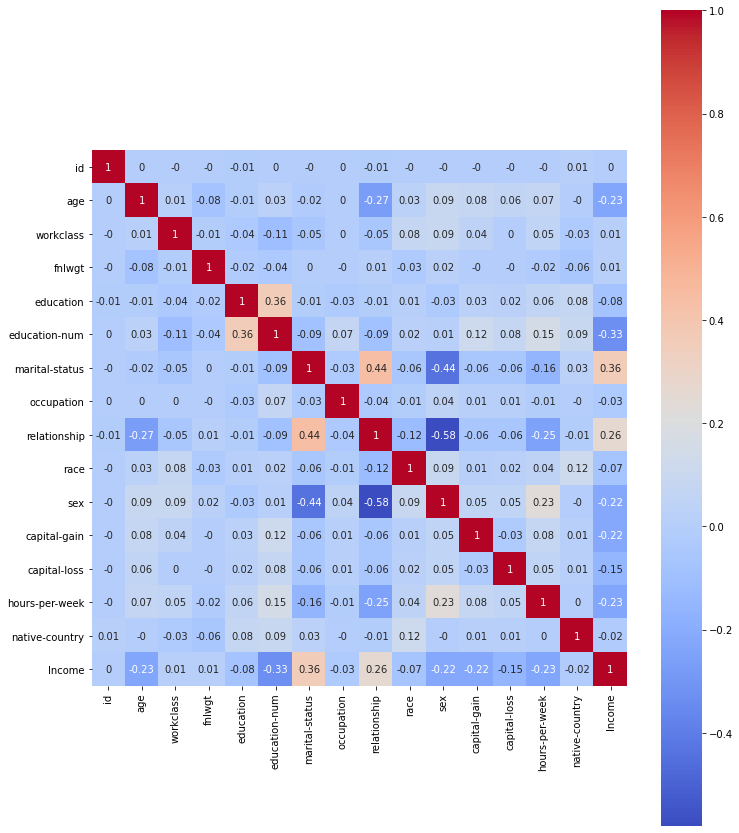

In [291]:
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(12,15))
sns.heatmap(data=correlation_matrix, annot=True ,square=True, cmap= 'coolwarm')

In [292]:
df.nunique()

id                41516
age                  74
workclass             5
fnlwgt            25613
education            16
education-num        16
marital-status        4
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        122
capital-loss         98
hours-per-week       95
native-country       41
Income                2
dtype: int64

### **KNN**

In [293]:
x= df.drop(['id','fnlwgt','workclass','education','occupation','race','native-country','Income'], axis =1)
y= df['Income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

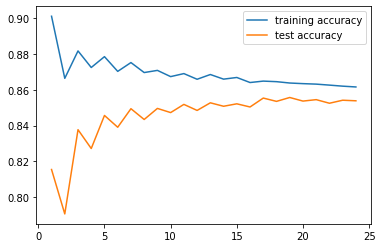

In [294]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,25)

for n in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train, y_train)
  training_accuracy.append(knn.score(x_train, y_train))
  test_accuracy.append(knn.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label ="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label ="test accuracy")
plt.legend()

In [295]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, stratify = y, random_state=42)
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
print("Training Accuracy : " + str(knn.score(x_train,y_train)))
print("Testing Accuracy : " + str(knn.score(x_test,y_test))) 

Training Accuracy : 0.8648704449261897
Testing Accuracy : 0.8553994379767161


In [296]:
X_test = test.drop(['id','fnlwgt','workclass','education','occupation','race','native-country'], axis =1)
pred = knn.predict(X_test)
original['Income_knn'] =pred
original.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn
0,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
1,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0
2,15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,1
3,30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,1
4,34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,1


### **LOGISTIC REGRESSION**

In [297]:
x= df.drop(['id','fnlwgt','workclass','education','occupation','race','native-country','Income'], axis =1)
y= df['Income']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state=42)

In [298]:
lr = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
lr.fit(x_train, y_train)

print("Training Accuracy : " + str(lr.score(x_train,y_train)))
print("Testing Accuracy : " + str(lr.score(x_test,y_test)))

Training Accuracy : 0.8386485531682564
Testing Accuracy : 0.8367858175161383


In [299]:
X_test = test.drop(['id','fnlwgt','workclass','education','occupation','race','native-country'], axis =1)
pred = lr.predict(X_test)
original['Income_lr'] =pred
original.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn,Income_lr
0,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0,0
1,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0,0
2,15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,1,1
3,30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,1,1
4,34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,1,1


### **DECISION TREE**

In [300]:
x= df.drop(['id','fnlwgt','workclass','education','occupation','race','native-country','Income'], axis =1)
y= df['Income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 42)

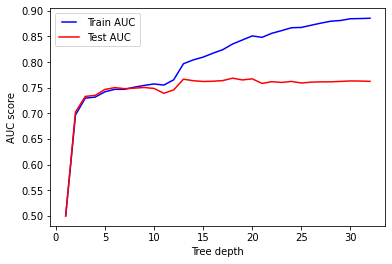

In [301]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [302]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)

print("Decision Tree Results :")
print("Training Accuracy : " + str(tree.score(x_train,y_train)))
print("Testing Accuracy : " + str(tree.score(x_test,y_test)))

Decision Tree Results :
Training Accuracy : 0.8638597167357164
Testing Accuracy : 0.8546102707389922


In [303]:
X_test = test.drop(['id','fnlwgt','workclass','education','occupation','race','native-country'], axis =1)
pred = tree.predict(X_test)
original['Income_dt'] =pred
original.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn,Income_lr,Income_dt
0,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0,0,0
1,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0,0,0
2,15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,1,1,1
3,30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,1,1,1
4,34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,1,1,1


### **RANDOM FOREST**

In [304]:
x= df.drop(['id','fnlwgt','workclass','education','occupation','race','native-country','Income'], axis =1)
y= df['Income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [305]:
best_score = 0
n_trees = list(range(10,200, 10))

for trees in n_trees:
    rf_trees = RandomForestClassifier(n_estimators = trees, n_jobs = -1)
    rf_trees.fit(x_train, y_train)
    score = rf_trees.score(x_test, y_test)
    print("Trees =", trees, ": Score = ", score)
    if score > best_score:
        best_score = score
        best_parameters = trees

print("Best score = ", best_score)
print("No of Trees = ", best_parameters)

Trees = 10 : Score =  0.8390204737053393
Trees = 20 : Score =  0.839502207948615
Trees = 30 : Score =  0.8426334805299077
Trees = 40 : Score =  0.8432757928542753
Trees = 50 : Score =  0.8445604175030108
Trees = 60 : Score =  0.8434363709353673
Trees = 70 : Score =  0.8451224407868326
Trees = 80 : Score =  0.8455238859895624
Trees = 90 : Score =  0.8454435969490165
Trees = 100 : Score =  0.8463267763950221
Trees = 110 : Score =  0.8453633079084705
Trees = 120 : Score =  0.8452830188679246
Trees = 130 : Score =  0.8454435969490165
Trees = 140 : Score =  0.8456844640706543
Trees = 150 : Score =  0.8468085106382979
Trees = 160 : Score =  0.8439983942191891
Trees = 170 : Score =  0.8450421517462866
Trees = 180 : Score =  0.846728221597752
Trees = 190 : Score =  0.8460859092733842
Best score =  0.8468085106382979
No of Trees =  150


In [306]:
rf_trees = RandomForestClassifier(n_estimators = best_parameters, n_jobs = -1)
rf_trees.fit(x_train, y_train)
print("Training Accuracy : " + str(rf_trees.score(x_train,y_train)))
print("Testing Accuracy : " + str(rf_trees.score(x_test,y_test)))

Training Accuracy : 0.9228863425209043
Testing Accuracy : 0.8464070654355681


In [307]:
X_test = test.drop(['id','fnlwgt','workclass','education','occupation','race','native-country'], axis =1)
pred = rf_trees.predict(X_test)
original['Income_rf'] = pred
original.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn,Income_lr,Income_dt,Income_rf
0,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0,0,0,0
1,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0,0,0,0
2,15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,1,1,1,1
3,30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,1,1,1,1
4,34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,1,1,1,1


### ***GETTING CSV***

In [308]:
original.to_csv('/content/result.csv', index=False)